- NOME: Lucas Passarete Cardoso

1.	PRAZO PARA ENTREGA: 26/05/2025
2.	A PROVA ESTÁ DIVIDIDA EM 3 PARTES, SENDO:
    - I.	ANÁLISE DE DADOS
    - II.	RACIOCÍNIO LÓGICO
    - III.	LEITURA DE ARTIGO TÉCNICO

3.	PARA ALGUMAS QUESTÕES, NÃO HÁ APENAS UMA RESPOSTA CORRETA. O QUE ESTÁ SENDO AVALIADO É O SEU RACIOCÍNIO. DESSA FORMA, RECOMENDAMOS NÃO DEIXAR NENHUMA RESPOSTA EM BRANCO.


## PARTE 1 – ANÁLISE DE DADOS

### PROBLEMA 1. VEJA O DIAGRAMA DE VENN ABAIXO E RESPONDA AS SEGUINTES QUESTÕES.

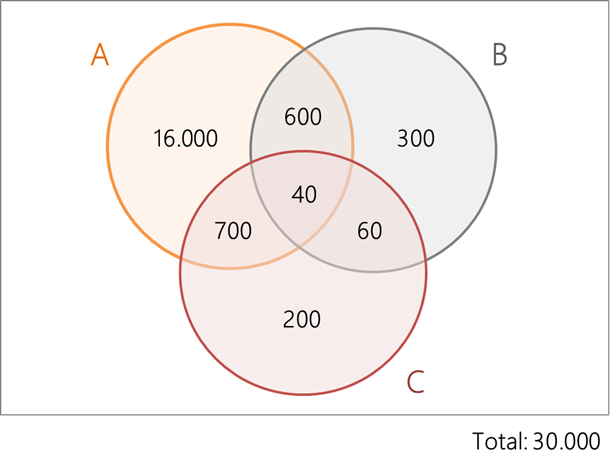

#### A)	QUAL É A QUANTIDADE DE OBSERVAÇÕES QUE ESTÁ EM NENHUM DOS GRUPOS (A, B E C)?

In [2]:
A_u_B_u_C = 16000 + 600 + 300 + 700 + 40 + 60 + 200 #17900
total = 30000

nenhum_grupo = total - A_u_B_u_C
print(f"Não está em nenhum grupo {nenhum_grupo} observações")

Não está em nenhum grupo 12100 observações


In [3]:
A = 16000 + 700 + 600 + 40
B = 300 + 600 + 40 + 60

PA = round((A / total) * 100, 2)
PB = round((B / total) * 100, 2)
Pnenhum_grupo = round((nenhum_grupo / total) * 100, 2)
print(f" Prob A: {PA} \n Prob B: {PB} \n Prob Nenhum: {Pnenhum_grupo}")

 Prob A: 57.8 
 Prob B: 3.33 
 Prob Nenhum: 40.33


#### B)	QUAL É A QUANTIDADE DE OBSERVAÇÕES CONTIDAS EM A OU B?

In [4]:
# A união B
A_u_B = 16000 + 700 + 600 + 40 + 60 + 300

print(f"A ∪ B = {A_u_B}")

A ∪ B = 17700


#### C)	QUAL É A QUANTIDADE DE OBSERVAÇÕES CONTIDAS EM B E C?

In [ ]:
# B intersecção C
B_i_C = 60 + 40

print(f"B ∩ C = {B_i_C} ")

B ∩ C = 100 


#### D)	QUAL É A PROBABILIDADE DE UMA OBSERVAÇÃO ESTAR NO GRUPO C?

In [ ]:
C = 700 + 40 + 60 + 200

# Probabilidade da observação estar em C
P_x_C = round((C / total) * 100, 2)

print(f"P(x ∈ C) = {P_x_C}%")

P(x ∈ C) = 3.33%


### PROBLEMA 2. ANALISE A BASE DE DADOS ABAIXO E RESPONDA AS QUESTÕES. 

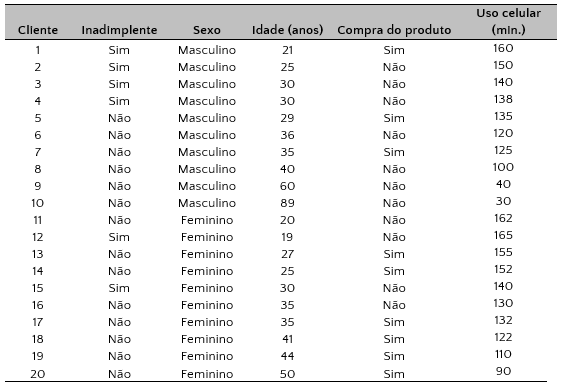

In [119]:
# Carregando pacote de dados
import numpy as np
import pandas as pd
from scipy.stats import shapiro, levene, f_oneway, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [45]:
# Criando a base de dados:

dados = {
    'Cliente': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'Inadimplente': ["Sim","Sim","Sim","Sim","Não","Não","Não","Não","Não","Não","Não","Sim","Não","Não","Sim","Não","Não","Não","Não","Não"],
    'Sexo' : ["Masculino","Masculino","Masculino","Masculino","Masculino","Masculino","Masculino","Masculino","Masculino","Masculino","Feminino","Feminino","Feminino","Feminino","Feminino","Feminino","Feminino","Feminino","Feminino","Feminino"],
    'Idade (anos)' : [21,25,30,30,29,36,35,40,60,89,20,19,27,25,30,35,35,41,44,50],
    'Compra do produto' : ["Sim","Não","Não","Não","Sim","Não","Sim","Não","Não","Não","Não","Não","Sim","Sim","Não","Não","Sim","Sim","Sim","Sim"],
    'Uso celular (min.)' : [160,150,140,138,135,120,125,100,40,30,162,165,155,152,140,130,132,122,110,90]
}

# Criando o Dataframe
df = pd.DataFrame(dados)
df

,Cliente,Inadimplente,Sexo,Idade (anos),Compra do produto,Uso celular (min.)
0,1,Sim,Masculino,21,Sim,160
1,2,Sim,Masculino,25,Não,150
2,3,Sim,Masculino,30,Não,140
3,4,Sim,Masculino,30,Não,138
4,5,Não,Masculino,29,Sim,135
5,6,Não,Masculino,36,Não,120
6,7,Não,Masculino,35,Sim,125
7,8,Não,Masculino,40,Não,100
8,9,Não,Masculino,60,Não,40
9,10,Não,Masculino,89,Não,30


#### A)	EXISTE RELAÇÃO ENTRE IDADE E SEXO? EM QUAL GRUPO EXISTE MAIOR VARIABILIDADE DA IDADE? JUSTIFIQUE AMBAS AS RESPOSTAS.

In [63]:
# Relação entre Idade e Sexo

# Normalizando as idades
df['Idade_log'] = np.log(df['Idade (anos)'])

## Separando os grupos
homens = df[df['Sexo'] == 'Masculino']['Idade_log']
mulheres = df[df['Sexo'] == 'Feminino']['Idade_log']

# Teste de normalidade
# H0: Os dados seguem uma distribuição Normal.
# H1: os dados não seguem uma distribuição Normal.
print('Shapiro Masculino', shapiro(homens))
print('Shapiro Feminino', shapiro(mulheres))

# Teste de homogeneidade de variância
# H0: As variâncias são iguais
# H1: As variâncias são diferentes
stat, p = levene(homens, mulheres)
print(f'\nTeste de Levene: estatística = {stat: .4f}, p-valor = {p: .4f}')

# Teste ANOVA
# H0: As médias dos grupos são iguais
# H1: Há pelo menos uma média diferente
stat, p_valor = f_oneway(homens, mulheres)
print(f'\n Análise de Variância (ANOVA): \nEstatística F: {stat: .4f}, p-valor: {p_valor: .4f}')

Shapiro Masculino ShapiroResult(statistic=0.9048601952714692, pvalue=0.24751729456068222)
Shapiro Feminino ShapiroResult(statistic=0.9603527457367101, pvalue=0.7898873839650388)

Teste de Levene: estatística =  0.0790, p-valor =  0.7819

 Análise de Variância (ANOVA): 
Estatística F:  0.7494, p-valor:  0.3981


<Axes: xlabel='Idade (anos)', ylabel='Sexo'>

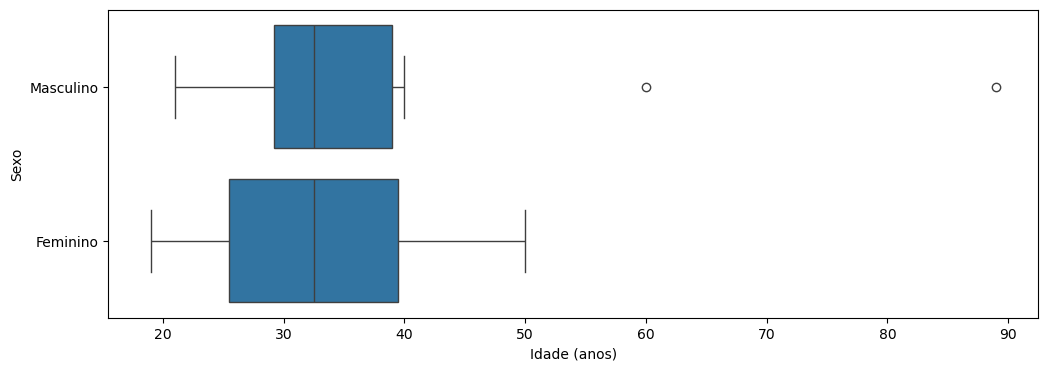

In [68]:
# Maior variabilidade de idade
plt.figure(figsize=(12,4))

#sns.boxplot(data = df, x = 'Idade (anos)', y = 'Sexo')
sns.boxplot(data = df, x = 'Idade (anos)', y = 'Sexo')

##### **Resposta:**

    Não existe relação estatisticamente significativa entre os sexos e à idade, após realizar a transformação logarítmica aplicada cumprir com os pressupostos da ANOVA. O teste resultou no p-valor de 0.3981 (> 0.05), ou seja, não rejeitamos a hipótese nula, indicando que as médias das idades nos dois grupos são estatísticamente semelhantes.
<br>

    Quanto a variabilidade da idade, o grupo feminino apresenta maior dispersão. Podemos notar isso no boxplot, onde o intervalo interquartil das mulheres é mais largo e os dados estão mais espalhados.

#### B)	EXISTE RELAÇÃO ENTRE USO DO CELULAR E IDADE? JUSTIFIQUE. 

<Axes: >

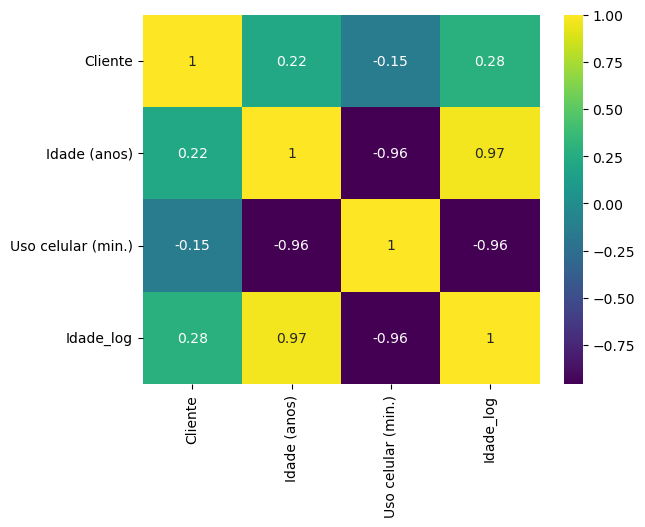

In [ ]:
# Correlação das variáveis
corr = df.corr(numeric_only=True)

# Plot das correlações
sns.heatmap(corr, cmap='viridis', annot=True)

##### **Resposta:**

    Existe relação entre o uso do celular e a idade. Podemos notar isso através do heatmap, onde há uma correlação negativa, ou seja, existe uma relação entre as variáveis tais que quando uma aumenta, a outra diminui, e vice versa. Aplicando no nosso exemplo, quanto maior a idade, menor tempo de uso de celular; e quanto menor a idade, maior tempo de uso de celular.

#### C)	EXISTE RELAÇÃO ENTRE INADIMPLÊNCIA E COMPRA DO PRODUTO? JUSTIFIQUE

In [ ]:
# Tabela de contingência
tabela = pd.crosstab(df['Sexo'], df['Compra do produto'])
print(tabela)

# Teste Qui-Quadrado
# H0: Não existe associação entre o sexo da pessoa e a compra do produto
# H1: Existe associação entre o sexo da pessoa e a compra
chi2, p, dof, expected = chi2_contingency(tabela)

print(f'\nEstatística do Qui-Quadrado: {chi2 : .4f} \n p-valor: {p : .4f} \n Graus de liberdade: {dof}')

Compra do produto  Não  Sim
Sexo                       
Feminino             4    6
Masculino            7    3

Estatística do Qui-Quadrado:  0.8081 
 p-valor:  0.3687 
 Graus de liberdade: 1


##### **Resposta:**

    Não existe relação estatisticamente significativa entre inadimplência e a compra do produto. Podemos notar isso através do teste Qui-Quadrado, onde o p-valor deu 0.3687, ou seja, não rejeito a hipótese nula, indicando que não existe associação entre inadimplência e compra de produto.

### PROBLEMA 3. UMA EMPRESA FEZ DOIS ANÚNCIOS NA INTERNET. PROPONHA UM MÉTODO PARA FAZER A AVALIAÇÃO DA CAMPANHA, COM BASE NOS DADOS DA TABELA ABAIXO. 

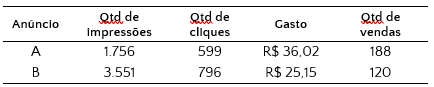

- QUANTIDADE DE IMPRESSÕES: NÚMERO DE VEZES QUE O ANÚNCIO FOI EXIBIDO
- QUANTIDADE DE CLIQUES: NÚMERO DE VEZES QUE OS USUÁRIOS CLICARAM NO ANÚNCIO
- GASTO TOTAL COM O ANÚNCIO					
- QUANTIDADE DE VENDAS


NO PRÓXIMO MÊS, APENAS UMA CAMPANHA ENTRARÁ NO AR. QUAL DELAS VOCÊ RECOMENDARIA: A OU B? JUSTIFIQUE BEM SUA RESPOSTA.

In [150]:
# Criando Dataframe
data = {
    'Campanha': ['A', 'B'],
    'Qtd de Impressões': [1756,3551],
    'Qtd de cliques': [599, 796],
    'Gasto': [36.02, 25.15],
    'Qtd de vendas': [188, 120]
}


dados = pd.DataFrame(data=data)
dados.index = dados['Campanha']

In [158]:
# Taxa de clique
taxa_clique = dados['Qtd de cliques'] / dados['Qtd de Impressões']
taxa_clique = taxa_clique.map(lambda x: f'{x : .4f}')
# Taxa de conversão
taxa_conversão = dados['Qtd de vendas'] / dados['Qtd de cliques']
taxa_conversão = taxa_conversão.map(lambda x: f'{x : .4f}')
# Custo por venda
custo_venda = dados['Gasto'] / dados['Qtd de vendas']
custo_venda = custo_venda.map(lambda x: f'{x : .4f}')


print(f'A taxa de cliques foi: \n{taxa_clique.to_string()} \n\nA taxa de conversão foi: \n{taxa_conversão.to_string()} \n\nO custo por venda foi: \n{custo_venda.to_string()}')

A taxa de cliques foi: 
Campanha
A     0.3411
B     0.2242 

A taxa de conversão foi: 
Campanha
A     0.3139
B     0.1508 

O custo por venda foi: 
Campanha
A     0.1916
B     0.2096


##### **Resposta:**

    Com base nos dados, Campanha A teve maior engajamento (taxa de cliques), o dobro da taxa de conversão e custou menos por venda, logo eu recomendaria a Campanha A.

## PARTE 2 – RACIOCÍNIO LÓGICO

#### PROBLEMA 1: FAÇA UMA ESTIMATIVA DE QUANTOS POSTOS DE GASOLINA EXISTEM NO MUNICÍPIO DE SÃO PAULO. LEMBRE-SE DE QUE AQUI O SEU RACIOCÍNIO VALERÁ MAIS DO QUE O NÚMERO FINAL. PORTANTO, DEIXE TODAS AS SUPOSIÇÕES E A LÓGICA DE FORMA CLARA.

- Suposições:
    - **População município de São Paulo:** 12.000.000 habitantes
    <br>
    <br>
    - **N° de veículos:** 1 carro a cada 2 habitantes
    <br>
    <br>
    - **Quantidades de bombas:** 6 bombas
    <br>
    <br>
    - **Quantidade de bicos por bomba:** 2 bicos
    <br>
    <br>
    - **Tempo de abastecimento:** 6 minutos
    <br>
    <br>
    - **Carros atendidos por bico:** 10 carros / hora
    <br>
    <br>
    - **Funcionamento do Posto:** 16 horas/dia
    <br>
    <br>
    - **Autonomia do tanque:** 1 tanque por semana (1/7 ~ 0,14)
    <br>
    <br>

- Cálculos:

    - **N° de veículos:** (_População / N° veículos_) <br> <br>
    12000000 / 2 = 6.000.000 veículos

    - **N° carros abastecidos por dia em um posto:** (_N° bombas * N° bicos * carros por bico por hora * tempo funcionamento_) <br> <br>
    6 * 2 * 10 * 16 = 1920 carros/dia

    - **Frequência de abastecimento por dia:** (_N° veículos * Autonomia do tanque_) <br> <br>
    6000000 * 0,14 = 840.000 abastecimentos por dia

    - **Quantidade de postos necessárias:** (_Abastecimentos por dia / N° carros abastecidos por dia_) <br> <br>
    840000 / 1920 ≈ 438 postos

##### **Resposta:**

    Com base nas suposições acima, estimo que existam cerca de 438 postos de gasolina no município de São Paulo.

#### PROBLEMA 2: IMAGINE QUE VOCÊ TENHA UMA BALANÇA DE DOIS PRATOS E 60 MOEDAS, SENDO QUE UMA DELAS TEM O PESO DIFERENTE. EXPLIQUE QUAL SERIA A METODOLOGIA UTILIZADA PARA DESCOBRIR QUAL É A MOEDA COM PESO DIFERENTE DE FORMA QUE O NÚMERO DE PESAGENS SEJA MÍNIMO.


- **1° pesagem:** 60 moedas - 3 grupos de 20 moedas

    g1_i1 = 20
    <br>
    g2_i1 = 20
    <br>
    <br>

    - **Realizo a pesagem do grupo 1 x grupo 2, anoto os resultados. Posso ter os seguinte resultados:**
        - 1- Os dois grupos de 20 moedas possuem o mesmo peso -> Logo, a _Moeda de peso diferente_ está no g3 (grupo 3)
        - 2- A _Moeda de peso diferente_ está no g1 ou no g2, porém não sei se ela é mais pesada ou mais leve, portanto sigo com a próxima iteração
    <br>
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

- **2° pesagem:** 60 moedas - 3 grupos de 20 moedas

    g1_i2 = 20
    <br>
    g3_i2 = 20
    <br>
    <br>

    - **Realizo a pesagem do grupo 1 x grupo 3, anoto os resultados. Posso ter os seguinte resultados:**
        - 1- Os dois grupos de 20 moedas possuem o mesmo peso -> Logo, a _Moeda de peso diferente_ está no g2 (grupo 2)
        - 2- A _Moeda de peso diferente_ está no g1 ou no g3, porém como já comparamos grupo 1 x grupo 2, sabemos que a moeda diferente está no grupo 1. Além de que conseguimos identificar o grupo, conseguimos identificar a direção do peso (mais leve ou mais pesada)

    - **Irei chamar essa moeda de "_Moeda de peso diferente_"**
    <br>
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
- **3° pesagem:** Grupo 20 moedas suspeitas - 3 grupos 7, 7, 6

    g1_i3 = 7
    <br>
    g2_i3 = 7
    <br>
    <br>

    - **Ao realizar a pesagem, tenho 2 possíveis resultados:**
        - 1- Os dois grupos de 7 moedas que foram pesados possuem o mesmo peso -> Logo, o grupo não pesado de 6 moedas tem a __Moeda de peso diferente__.
        - 2- Um dos grupos de 7 moedas estava com a _Moeda de peso diferente_
    <br>
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

- **4° pesagem:** Grupo 7 moedas suspeitas - 3 grupos 2, 2, 3

    g1_i4 = 2
    <br>
    g2_i4 = 2
    <br>
    <br>
    - **Ao realizar a pesagem, tenho 2 possíveis resultados:**
        - 1- Os dois grupos de 2 moedas que foram pesados possuem o mesmo peso -> Logo, o grupo não pesado de 3 moedas tem a __Moeda de peso diferente__.
        - 2- Um dos grupos de 2 moedas estava com a _Moeda de peso diferente_
    <br>
    <br>
- **OU**
    <br>
    <br>
- **4° pesagem:** Grupo 6 moedas suspeitas - 3 grupos 2, 2, 2

    g1_i4 = 2
    <br>
    g2_i4 = 2
    <br>
    <br>

    - **Ao realizar a pesagem, tenho 2 possíveis resultados:**
        - 1- Os dois grupos de 2 moedas que foram pesados possuem o mesmo peso -> Logo, o grupo não pesado de 2 moedas tem a _Moeda de peso diferente_.
        - 2- Um dos grupos de 2 moedas estava com a _Moeda de peso diferente_
    <br>
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

- **5° pesagem:** Grupo de 3 moedas suspeitas - 3 grupos 1, 1, 1

    g1_i5 = 1
    <br>
    g2_i5 = 1
    <br>
    <br>
    - **Ao realizar a pesagem, tenho 2 possíveis resultados:**
        - 1- Os dois grupos de 1 moedas que foram pesados possuem o mesmo peso -> Logo, o grupo não pesado de 1 moedas tem a _Moeda de peso diferente_.
        - 2- Um dos grupos de 1 moedas estava com a _Moeda de peso diferente_
    <br>
    <br>
    - **OU**
    <br>
    <br>
- **5° pesagem:** Grupo de 2 moedas suspeitas - 2 grupos 1, 1

    g1_i5 = 1
    <br>
    g2_i5 = 1
    <br>
    <br>
    - **Ao realizar a pesagem, concluo que:**
        - Um dos grupos de 1 moedas estava com a _Moeda de peso diferente_

##### **Resposta:**

    Com base na demonstação acima, chego que o número mínimo de pesagens para descobrir qual a moeda de peso diferente, na qual pode ser tanto leve quanto pesada, é de 5 pesagens.

## PARTE 3 – LEITURA DE ARTIGO TÉCNICO

- LEIA O ABSTRACT DO ARTIGO A SEGUIR E RESPONDA AS QUESTÕES EM PORTUGUÊS.  
<br>
<br>

_“THE K-NEAREST-NEIGHBOURS (KNN) IS A NON-PARAMETRIC CLASSIFICATION METHOD, WHICH IS SIMPLE BUT EFFECTIVE IN MANY CASES. FOR A NEW DATA RECORD TO BE CLASSIFIED, ITS K NEAREST NEIGHBOURS ARE SELECTED, AND THIS FORMS A NEIGHBOURHOOD OF THIS NEW DATA RECORD. MAJORITY VOTING AMONG THE DATA RECORDS IN THE NEIGHBOURHOOD IS USUALLY USED TO DECIDE THE CLASSIFICATION FOR THIS NEW DATA RECORD WITH OR WITHOUT CONSIDERATION OF DISTANCE-BASED WEIGHTING. HOWEVER, TO APPLY KNN WE NEED TO CHOOSE AN APPROPRIATE VALUE FOR K, AND THE SUCCESS OF CLASSIFICATION IS VERY MUCH DEPENDENT ON THIS VALUE. IN A SENSE, THE KNN METHOD IS BIASED BY K. THERE ARE MANY WAYS OF CHOOSING THE K VALUE, BUT A SIMPLE ONE IS TO RUN THE ALGORITHM MANY TIMES WITH DIFFERENT K VALUES AND CHOOSE THE ONE WITH THE BEST PERFORMANCE. IN ORDER FOR KNN TO BE LESS DEPENDENT ON THE CHOICE OF K, H. WANG PROPOSED TO LOOK AT MULTIPLE SETS OF NEAREST NEIGHBOURS RATHER THAN JUST ONE SET OF K-NEAREST NEIGHBOURS. HOWEVER, IN ITS BASIC FORM THE METHOD IS RELATIVELY SLOW, THOUGH IT IS INDEED LESS DEPENDENT ON K AND IS ABLE TO ACHIEVE CLASSIFICATION PERFORMANCE CLOSE TO THAT FOR THE BEST K.”_

#### A)	QUAL É O OBJETIVO DA TÉCNICA KNN?

    O K-NEAREST-NEIGHBOURS (KNN) é um método de classificação não paramétrico, onde seu objetivo é classificar um novo dado, através da seleção de K vizinhos mais próximos, ja conhecidos do conjunto de dados. Essa classificação é determinada por votação da maioria dos vizinhos.

#### B)	QUAIS SÃO OS FATORES QUE INFLUENCIAM NO RESULTADO?

    - Valor de k (quantidade de vizinhos)

    - A distância entre os dados
    
    - Ponderação pela distância (vizinhos mais próximos podem influenciar mais)

#### C)	QUAL É A FORMA MAIS SIMPLES DE SE ESCOLHER O VALOR DE K?

    Existem diversas formas de escolher o k, porém a mais simples é rodar o algoritmo e testar diferentes valores de K, até decidir pelo valor que obteve a melhor performace na classificação.

#### D)	QUAL FOI O MÉTODO PROPOSTO POR H. WANG? QUAIS SÃO O PRÓ E O CONTRA DESSA METODOLOGIA?

    H. Wang propôs olhar para múltiplos conjuntos de vizinhos  mais próximos, ao invés de somente um valor fixo de K.
    
    Pró:
    - Ficar menos dependente da escolha de K.
    
    Contra:
    - O metódo é relativamente lento.